In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from feature_engine import encoding, creation
from sklearn import base, pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


import warnings
warnings.filterwarnings('ignore')

# adjust the style to emulate ggplot
plt.style.use('ggplot')

In [2]:
bicing = pd.read_parquet(r'../data/processed/bicing_full.parquet')
#bicing = pd.concat([bicing[bicing['year']==2020].sample(100000), bicing[bicing['year']==2021].sample(100000), bicing[bicing['year']==2022].sample(100000), bicing[bicing['year']==2023].sample(100000)])
bicing = pd.concat([bicing[bicing['year']==2021].tail(25000), bicing[bicing['year']==2022].tail(50000)])

In [3]:
bicing

,station_id,year,month,day,hour,ctx_1,ctx_2,ctx_3,ctx_4,post_code,...,min_temp,avg_rel_humidity,acum_precipitation,avg_atm_pressure,global_solar_rad,avg_wind_speed,avg_wind_direction,max_wind_speed,max_streak_wind_direction,percentage_docks_available
13306798,516,2021,10,10,18,0.550000,0.550000,0.550000,0.550000,8030.0,...,15.725,71.75,0.0,1001.599976,7.033333,1.333333,151.333328,5.066667,171.333328,0.523810
13306799,516,2021,10,10,19,0.523810,0.550000,0.550000,0.550000,8030.0,...,15.725,71.75,0.0,1001.599976,7.033333,1.333333,151.333328,5.066667,171.333328,0.571429
13306800,516,2021,10,10,20,0.571429,0.523810,0.550000,0.550000,8030.0,...,15.725,71.75,0.0,1001.599976,7.033333,1.333333,151.333328,5.066667,171.333328,0.571429
13306801,516,2021,10,10,21,0.571429,0.571429,0.523810,0.550000,8030.0,...,15.725,71.75,0.0,1001.599976,7.033333,1.333333,151.333328,5.066667,171.333328,0.571429
13306802,516,2021,10,10,22,0.571429,0.571429,0.571429,0.523810,8030.0,...,15.725,71.75,0.0,1001.599976,7.033333,1.333333,151.333328,5.066667,171.333328,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13386431,519,2022,12,31,19,0.895833,0.916667,0.875000,0.958333,8032.0,...,12.175,59.50,0.0,1003.966675,8.600000,2.766667,264.333344,11.433333,295.333344,0.750000
13386432,519,2022,12,31,20,0.750000,0.895833,0.916667,0.875000,8032.0,...,12.175,59.50,0.0,1003.966675,8.600000,2.766667,264.333344,11.433333,295.333344,0.666667
13386433,519,2022,12,31,21,0.666667,0.750000,0.895833,0.916667,8032.0,...,12.175,59.50,0.0,1003.966675,8.600000,2.766667,264.333344,11.433333,295.333344,0.583333
13386434,519,2022,12,31,22,0.583333,0.666667,0.750000,0.895833,8032.0,...,12.175,59.50,0.0,1003.966675,8.600000,2.766667,264.333344,11.433333,295.333344,0.583333


In [4]:
def tweak_bicing(df_: pd.DataFrame) -> pd.DataFrame:

    return (df_
            .astype({'station_id': 'category'})  
            .drop(columns=['post_code', 'lat', 'lon', 'capacity', 'max_temp', 'min_temp', 'avg_atm_pressure', 'avg_wind_direction', 
                           'max_wind_speed', 'max_streak_wind_direction', 'global_solar_rad'])
            )

In [5]:
tweak_bicing(bicing)

,station_id,year,month,day,hour,ctx_1,ctx_2,ctx_3,ctx_4,altitude,is_holiday,weekday,weekend,season,avg_temp,avg_rel_humidity,acum_precipitation,avg_wind_speed,percentage_docks_available
13306798,516,2021,10,10,18,0.550000,0.550000,0.550000,0.550000,15,False,7,True,autumn,17.900000,71.75,0.0,1.333333,0.523810
13306799,516,2021,10,10,19,0.523810,0.550000,0.550000,0.550000,15,False,7,True,autumn,17.900000,71.75,0.0,1.333333,0.571429
13306800,516,2021,10,10,20,0.571429,0.523810,0.550000,0.550000,15,False,7,True,autumn,17.900000,71.75,0.0,1.333333,0.571429
13306801,516,2021,10,10,21,0.571429,0.571429,0.523810,0.550000,15,False,7,True,autumn,17.900000,71.75,0.0,1.333333,0.571429
13306802,516,2021,10,10,22,0.571429,0.571429,0.571429,0.523810,15,False,7,True,autumn,17.900000,71.75,0.0,1.333333,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13386431,519,2022,12,31,19,0.895833,0.916667,0.875000,0.958333,110,False,6,True,winter,16.299999,59.50,0.0,2.766667,0.750000
13386432,519,2022,12,31,20,0.750000,0.895833,0.916667,0.875000,110,False,6,True,winter,16.299999,59.50,0.0,2.766667,0.666667
13386433,519,2022,12,31,21,0.666667,0.750000,0.895833,0.916667,110,False,6,True,winter,16.299999,59.50,0.0,2.766667,0.583333
13386434,519,2022,12,31,22,0.583333,0.666667,0.750000,0.895833,110,False,6,True,winter,16.299999,59.50,0.0,2.766667,0.583333


In [6]:
class TweakBicingTransformer(base.BaseEstimator, base.TransformerMixin):
    def __init__(self, ycol=None):
        self.ycol = ycol
        
    def transform(self, X):
        return tweak_bicing(X)
    
    def fit(self, X, y=None):
        return self

In [7]:
bicing_pl = pipeline.Pipeline(
    [
     ('tweak', TweakBicingTransformer()),
     ('cat_oneHot', encoding.OneHotEncoder(variables=['season', 'station_id'], drop_last=True)),
     ('cyclic', creation.CyclicalFeatures(variables=['day', 'month', 'hour', 'weekday'], drop_original=True))   
    ]
)

In [8]:
def get_rawX_y(df, y_col):
    raw = (df
           .set_index('year')
           #.drop(index=[2019, 2020, 2021, 2022])
           .reset_index()
          )
    return raw.drop(columns=['year', y_col]), raw[y_col]

bicing_X, bicing_y = get_rawX_y(bicing, 'percentage_docks_available')

In [9]:
bicing_X

,station_id,month,day,hour,ctx_1,ctx_2,ctx_3,ctx_4,post_code,lat,...,max_temp,min_temp,avg_rel_humidity,acum_precipitation,avg_atm_pressure,global_solar_rad,avg_wind_speed,avg_wind_direction,max_wind_speed,max_streak_wind_direction
0,516,10,10,18,0.550000,0.550000,0.550000,0.550000,8030.0,41.435459,...,20.750000,15.725,71.75,0.0,1001.599976,7.033333,1.333333,151.333328,5.066667,171.333328
1,516,10,10,19,0.523810,0.550000,0.550000,0.550000,8030.0,41.435459,...,20.750000,15.725,71.75,0.0,1001.599976,7.033333,1.333333,151.333328,5.066667,171.333328
2,516,10,10,20,0.571429,0.523810,0.550000,0.550000,8030.0,41.435459,...,20.750000,15.725,71.75,0.0,1001.599976,7.033333,1.333333,151.333328,5.066667,171.333328
3,516,10,10,21,0.571429,0.571429,0.523810,0.550000,8030.0,41.435459,...,20.750000,15.725,71.75,0.0,1001.599976,7.033333,1.333333,151.333328,5.066667,171.333328
4,516,10,10,22,0.571429,0.571429,0.571429,0.523810,8030.0,41.435459,...,20.750000,15.725,71.75,0.0,1001.599976,7.033333,1.333333,151.333328,5.066667,171.333328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,519,12,31,19,0.895833,0.916667,0.875000,0.958333,8032.0,41.424656,...,21.674999,12.175,59.50,0.0,1003.966675,8.600000,2.766667,264.333344,11.433333,295.333344
74996,519,12,31,20,0.750000,0.895833,0.916667,0.875000,8032.0,41.424656,...,21.674999,12.175,59.50,0.0,1003.966675,8.600000,2.766667,264.333344,11.433333,295.333344
74997,519,12,31,21,0.666667,0.750000,0.895833,0.916667,8032.0,41.424656,...,21.674999,12.175,59.50,0.0,1003.966675,8.600000,2.766667,264.333344,11.433333,295.333344
74998,519,12,31,22,0.583333,0.666667,0.750000,0.895833,8032.0,41.424656,...,21.674999,12.175,59.50,0.0,1003.966675,8.600000,2.766667,264.333344,11.433333,295.333344


In [10]:
bicing_pl.fit_transform(bicing_X, bicing_y)

,ctx_1,ctx_2,ctx_3,ctx_4,altitude,is_holiday,weekend,avg_temp,avg_rel_humidity,acum_precipitation,...,station_id_519,station_id_514,day_sin,day_cos,month_sin,month_cos,hour_sin,hour_cos,weekday_sin,weekday_cos
0,0.550000,0.550000,0.550000,0.550000,15,False,True,17.900000,71.75,0.0,...,0,0,8.978045e-01,-0.440394,-8.660254e-01,0.5,-9.790841e-01,0.203456,-2.449294e-16,1.00000
1,0.523810,0.550000,0.550000,0.550000,15,False,True,17.900000,71.75,0.0,...,0,0,8.978045e-01,-0.440394,-8.660254e-01,0.5,-8.878852e-01,0.460065,-2.449294e-16,1.00000
2,0.571429,0.523810,0.550000,0.550000,15,False,True,17.900000,71.75,0.0,...,0,0,8.978045e-01,-0.440394,-8.660254e-01,0.5,-7.308360e-01,0.682553,-2.449294e-16,1.00000
3,0.571429,0.571429,0.523810,0.550000,15,False,True,17.900000,71.75,0.0,...,0,0,8.978045e-01,-0.440394,-8.660254e-01,0.5,-5.195840e-01,0.854419,-2.449294e-16,1.00000
4,0.571429,0.571429,0.571429,0.523810,15,False,True,17.900000,71.75,0.0,...,0,0,8.978045e-01,-0.440394,-8.660254e-01,0.5,-2.697968e-01,0.962917,-2.449294e-16,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.895833,0.916667,0.875000,0.958333,110,False,True,16.299999,59.50,0.0,...,1,0,-2.449294e-16,1.000000,-2.449294e-16,1.0,-8.878852e-01,0.460065,-7.818315e-01,0.62349
74996,0.750000,0.895833,0.916667,0.875000,110,False,True,16.299999,59.50,0.0,...,1,0,-2.449294e-16,1.000000,-2.449294e-16,1.0,-7.308360e-01,0.682553,-7.818315e-01,0.62349
74997,0.666667,0.750000,0.895833,0.916667,110,False,True,16.299999,59.50,0.0,...,1,0,-2.449294e-16,1.000000,-2.449294e-16,1.0,-5.195840e-01,0.854419,-7.818315e-01,0.62349
74998,0.583333,0.666667,0.750000,0.895833,110,False,True,16.299999,59.50,0.0,...,1,0,-2.449294e-16,1.000000,-2.449294e-16,1.0,-2.697968e-01,0.962917,-7.818315e-01,0.62349


In [11]:
X_raw_train, X_raw_test, y_train, y_test = train_test_split(
    bicing_X, bicing_y, shuffle=True, random_state=42
)

In [12]:
X_train = bicing_pl.fit_transform(X_raw_train, y_train)
X_test = bicing_pl.transform(X_raw_test)

In [13]:
X_train

,ctx_1,ctx_2,ctx_3,ctx_4,altitude,is_holiday,weekend,avg_temp,avg_rel_humidity,acum_precipitation,...,station_id_517,station_id_514,day_sin,day_cos,month_sin,month_cos,hour_sin,hour_cos,weekday_sin,weekday_cos
1762,0.125000,0.150000,0.200000,0.250000,15,True,True,13.725000,73.00,0.000000,...,0,0,-9.377521e-01,0.347305,-2.449294e-16,1.000000,-0.997669,-0.068242,-7.818315e-01,0.623490
16752,0.888889,0.851852,0.851852,0.851852,112,False,False,10.350000,90.00,0.500000,...,0,0,-9.680771e-01,-0.250653,-2.449294e-16,1.000000,-0.269797,0.962917,4.338837e-01,-0.900969
1888,0.550000,0.600000,0.600000,0.600000,15,False,False,13.500000,75.50,0.000000,...,0,0,-2.449294e-16,1.000000,-2.449294e-16,1.000000,0.000000,1.000000,-9.749279e-01,-0.222521
15537,0.962963,0.925926,0.925926,0.925926,112,False,False,19.900000,77.00,0.000000,...,0,0,-7.907757e-01,-0.612106,-8.660254e-01,0.500000,0.997669,-0.068242,4.338837e-01,-0.900969
20060,0.791667,0.791667,0.791667,0.791667,110,False,False,16.525000,75.00,0.000000,...,0,0,-2.993631e-01,-0.954139,5.000000e-01,-0.866025,0.000000,1.000000,7.818315e-01,0.623490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0.173913,0.173913,0.173913,0.217391,19,False,False,28.125000,48.50,0.000000,...,0,0,-1.011683e-01,-0.994869,1.224647e-16,-1.000000,-0.887885,0.460065,-4.338837e-01,-0.900969
6265,0.842105,0.842105,0.842105,0.842105,44,False,False,24.950001,68.75,0.000000,...,1,0,8.486443e-01,0.528964,-5.000000e-01,-0.866025,-0.136167,-0.990686,7.818315e-01,0.623490
54886,0.315789,0.315789,0.350000,0.350000,44,False,True,25.500000,53.50,0.000000,...,1,0,5.712682e-01,0.820763,-5.000000e-01,-0.866025,-0.730836,0.682553,-2.449294e-16,1.000000
860,0.315789,0.368421,0.368421,0.368421,15,False,False,12.125000,67.75,0.000000,...,0,0,-2.993631e-01,-0.954139,-5.000000e-01,0.866025,0.519584,0.854419,4.338837e-01,-0.900969


In [14]:
X_test

,ctx_1,ctx_2,ctx_3,ctx_4,altitude,is_holiday,weekend,avg_temp,avg_rel_humidity,acum_precipitation,...,station_id_517,station_id_514,day_sin,day_cos,month_sin,month_cos,hour_sin,hour_cos,weekday_sin,weekday_cos
26837,0.266667,0.466667,0.437500,0.437500,16,False,False,11.150000,49.00,0.000000,...,0,1,0.848644,0.528964,8.660254e-01,-5.000000e-01,9.976688e-01,-0.068242,0.974928,-0.222521
2592,0.916667,0.875000,0.875000,0.875000,44,False,False,16.250000,69.25,0.000000,...,1,0,-0.394356,0.918958,5.000000e-01,8.660254e-01,-9.422609e-01,-0.334880,-0.974928,-0.222521
18359,0.869565,0.913043,0.869565,0.956522,110,False,False,12.675000,78.50,0.000000,...,0,0,0.394356,0.918958,1.000000e+00,6.123234e-17,-7.308360e-01,0.682553,0.974928,-0.222521
73292,0.473684,0.473684,0.473684,0.473684,110,False,False,21.325001,89.25,0.000000,...,0,0,-0.651372,-0.758758,-8.660254e-01,5.000000e-01,5.195840e-01,0.854419,0.433884,-0.900969
60127,0.777778,0.740741,0.814815,0.814815,112,False,True,11.075000,77.25,0.266667,...,0,0,-0.651372,-0.758758,8.660254e-01,5.000000e-01,-9.976688e-01,-0.068242,-0.781831,0.623490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17067,0.454545,0.545455,0.681818,0.681818,110,False,False,4.950000,65.00,0.000000,...,0,0,0.848644,0.528964,5.000000e-01,8.660254e-01,-2.449294e-16,1.000000,0.974928,-0.222521
63244,0.920000,0.960000,0.961538,0.960000,112,False,False,27.049999,69.50,0.000000,...,0,0,-0.937752,0.347305,-5.000000e-01,-8.660254e-01,-2.697968e-01,0.962917,0.781831,0.623490
24458,0.863636,0.909091,0.909091,0.909091,110,False,False,11.550000,71.25,0.000000,...,0,0,0.988468,0.151428,-2.449294e-16,1.000000e+00,-6.310879e-01,-0.775711,0.974928,-0.222521
17571,0.583333,0.583333,0.583333,0.583333,110,False,False,11.150000,64.75,0.000000,...,0,0,-0.724793,0.688967,5.000000e-01,8.660254e-01,7.308360e-01,0.682553,0.433884,-0.900969


In [15]:
reg = KNeighborsRegressor(n_neighbors=3)

In [16]:
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [17]:
reg.score(X_test, y_test)

0.9084841288761357

In [18]:
len(y_test)

18750

In [19]:
reg = KNeighborsRegressor(n_neighbors=1)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.8814656665039162

In [20]:
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.8862271901318105

In [21]:
reg = KNeighborsRegressor(n_neighbors=2)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.9164069909722231

In [22]:
import sys
sys.path.append('..')
from src.utils import save_object, load_object

save_object(r'../models/modelknr.pkl', reg)
save_object(r'../models/pipelineknr.pkl', bicing_pl)

In [23]:
bicing = pd.read_parquet(r'../data/processed/bicing_full.parquet')
bicing = bicing[bicing['year']==2021].tail(50000)
bicing

,station_id,year,month,day,hour,ctx_1,ctx_2,ctx_3,ctx_4,post_code,...,min_temp,avg_rel_humidity,acum_precipitation,avg_atm_pressure,global_solar_rad,avg_wind_speed,avg_wind_direction,max_wind_speed,max_streak_wind_direction,percentage_docks_available
13230478,513,2021,10,22,3,0.928571,0.928571,0.928571,0.964286,8017.0,...,14.725,72.25,0.033333,998.666687,9.566667,1.733333,196.666672,5.933333,342.333344,0.928571
13230479,513,2021,10,22,4,0.928571,0.928571,0.928571,0.928571,8017.0,...,14.725,72.25,0.033333,998.666687,9.566667,1.733333,196.666672,5.933333,342.333344,0.928571
13230480,513,2021,10,22,5,0.928571,0.928571,0.928571,0.928571,8017.0,...,14.725,72.25,0.033333,998.666687,9.566667,1.733333,196.666672,5.933333,342.333344,0.857143
13230481,513,2021,10,22,6,0.857143,0.928571,0.928571,0.928571,8017.0,...,14.725,72.25,0.033333,998.666687,9.566667,1.733333,196.666672,5.933333,342.333344,0.964286
13230482,513,2021,10,22,8,0.964286,0.857143,0.928571,0.928571,8017.0,...,14.725,72.25,0.033333,998.666687,9.566667,1.733333,196.666672,5.933333,342.333344,0.964286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13378128,519,2021,12,31,19,0.875000,0.958333,0.916667,0.916667,8032.0,...,9.625,75.50,0.000000,1005.566650,8.600000,1.166667,235.333328,4.900000,279.666656,0.875000
13378129,519,2021,12,31,20,0.875000,0.875000,0.958333,0.916667,8032.0,...,9.625,75.50,0.000000,1005.566650,8.600000,1.166667,235.333328,4.900000,279.666656,0.833333
13378130,519,2021,12,31,21,0.833333,0.875000,0.875000,0.958333,8032.0,...,9.625,75.50,0.000000,1005.566650,8.600000,1.166667,235.333328,4.900000,279.666656,0.875000
13378131,519,2021,12,31,22,0.875000,0.833333,0.875000,0.875000,8032.0,...,9.625,75.50,0.000000,1005.566650,8.600000,1.166667,235.333328,4.900000,279.666656,0.916667


In [24]:
bicing_X, bicing_y = get_rawX_y(bicing, 'percentage_docks_available')

In [25]:
X_test = bicing_pl.transform(bicing_X)

In [26]:
bicing_y

0        0.928571
1        0.928571
2        0.857143
3        0.964286
4        0.964286
           ...   
49995    0.875000
49996    0.833333
49997    0.875000
49998    0.916667
49999    0.958333
Name: percentage_docks_available, Length: 50000, dtype: float32

In [27]:
X_test

,ctx_1,ctx_2,ctx_3,ctx_4,altitude,is_holiday,weekend,avg_temp,avg_rel_humidity,acum_precipitation,...,station_id_517,station_id_514,day_sin,day_cos,month_sin,month_cos,hour_sin,hour_cos,weekday_sin,weekday_cos
0,0.928571,0.928571,0.928571,0.964286,111,False,False,17.125,72.25,0.033333,...,0,0,-9.680771e-01,-0.250653,-8.660254e-01,0.5,7.308360e-01,0.682553,-0.974928,-0.222521
1,0.928571,0.928571,0.928571,0.928571,111,False,False,17.125,72.25,0.033333,...,0,0,-9.680771e-01,-0.250653,-8.660254e-01,0.5,8.878852e-01,0.460065,-0.974928,-0.222521
2,0.928571,0.928571,0.928571,0.928571,111,False,False,17.125,72.25,0.033333,...,0,0,-9.680771e-01,-0.250653,-8.660254e-01,0.5,9.790841e-01,0.203456,-0.974928,-0.222521
3,0.857143,0.928571,0.928571,0.928571,111,False,False,17.125,72.25,0.033333,...,0,0,-9.680771e-01,-0.250653,-8.660254e-01,0.5,9.976688e-01,-0.068242,-0.974928,-0.222521
4,0.964286,0.857143,0.928571,0.928571,111,False,False,17.125,72.25,0.033333,...,0,0,-9.680771e-01,-0.250653,-8.660254e-01,0.5,8.169699e-01,-0.576680,-0.974928,-0.222521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.875000,0.958333,0.916667,0.916667,110,False,False,13.500,75.50,0.000000,...,0,0,-2.449294e-16,1.000000,-2.449294e-16,1.0,-8.878852e-01,0.460065,-0.974928,-0.222521
49996,0.875000,0.875000,0.958333,0.916667,110,False,False,13.500,75.50,0.000000,...,0,0,-2.449294e-16,1.000000,-2.449294e-16,1.0,-7.308360e-01,0.682553,-0.974928,-0.222521
49997,0.833333,0.875000,0.875000,0.958333,110,False,False,13.500,75.50,0.000000,...,0,0,-2.449294e-16,1.000000,-2.449294e-16,1.0,-5.195840e-01,0.854419,-0.974928,-0.222521
49998,0.875000,0.833333,0.875000,0.875000,110,False,False,13.500,75.50,0.000000,...,0,0,-2.449294e-16,1.000000,-2.449294e-16,1.0,-2.697968e-01,0.962917,-0.974928,-0.222521


In [28]:
y_pred = reg.predict(X_test)

In [29]:
y_pred

array([0.76086956, 0.7826087 , 0.7826087 , ..., 0.8541666 , 0.8958334 ,
       0.7708334 ], dtype=float32)

In [30]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = r2_score(bicing_y, y_pred)
print("R-squared:", r2)

rmse = mean_squared_error(bicing_y, y_pred, squared=False)
print("RMSE:", rmse)

R-squared: 0.4560644150905091
RMSE: 0.19492407


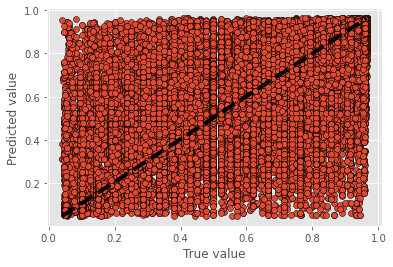

In [32]:
fig, ax = plt.subplots()
ax.scatter(bicing_y, y_pred, edgecolors=(0, 0, 0))
ax.plot([bicing_y.min(), bicing_y.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
ax.set_xlabel('True value')
ax.set_ylabel('Predicted value')
plt.show()